# Image classifier for the SVHN dataset
## Overview

In this notebook, I will create a neural network that classifies real-world images digits. I will use concepts from throughout this course in building, training, testing, validating and saving my Tensorflow classifier model.

## Let's get started!

We'll start by running some imports, and loading the dataset.

In [16]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import random


For this project, I will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [17]:
# Load the dataset from your Drive folder

train = loadmat('C:/Users/USER/OneDrive/Desktop/438 datasets/train_32x32.mat')
test = loadmat('C:/Users/USER/OneDrive/Desktop/438 datasets/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

# Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries already loaded.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel.
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [18]:
# Loading the dataset

x_train = train['X']
x_test = test['X']
y_train = train['y']
y_test = test['y']

In [19]:
# analysing the dimensions of the input
x_train.shape, x_test.shape

((32, 32, 3, 73257), (32, 32, 3, 26032))

In [20]:
# changing dimensions from (a, b, c, num_examples) to (num_examples, a, b, c)

x_train = np.moveaxis(x_train, -1, 0)
x_test = np.moveaxis(x_test, -1, 0)

In [21]:
# checking if dimensions have actually changed

x_train.shape, x_test.shape

((73257, 32, 32, 3), (26032, 32, 32, 3))

In [22]:
# Calculate the total number of images
num_images = x_train.shape[0] + x_test.shape[0]

print("Total Number of Images", num_images)

#x_train = x_train[:,:,:,0]

#x_test = x_test[:,:,:,0]

Total Number of Images 99289


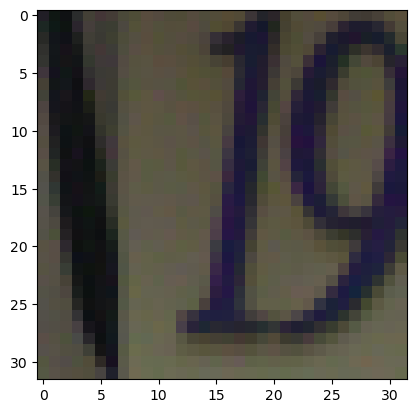

[1]


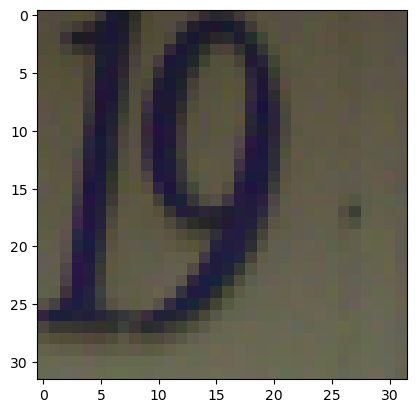

[9]


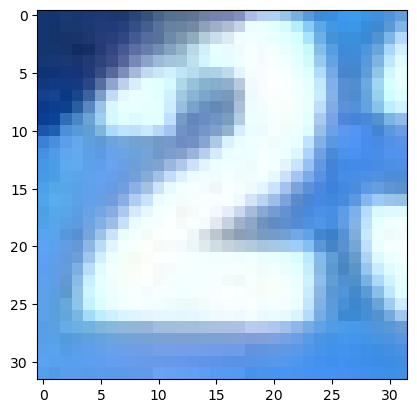

[2]


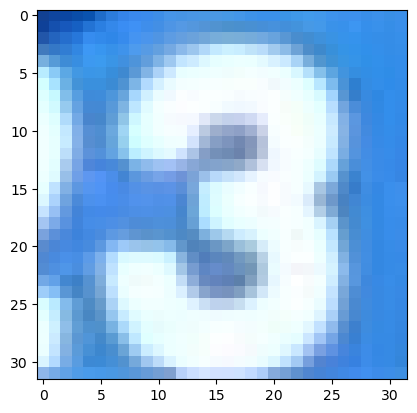

[3]


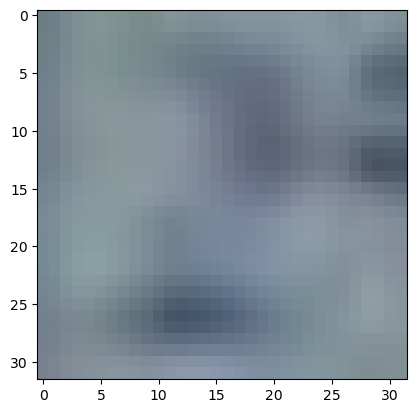

[2]


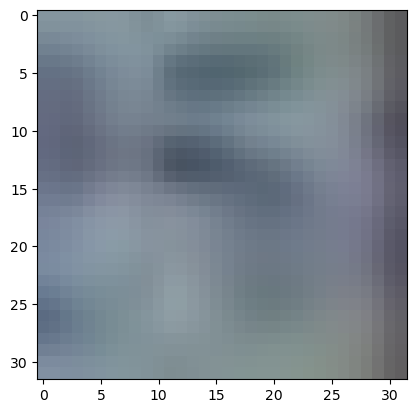

[5]


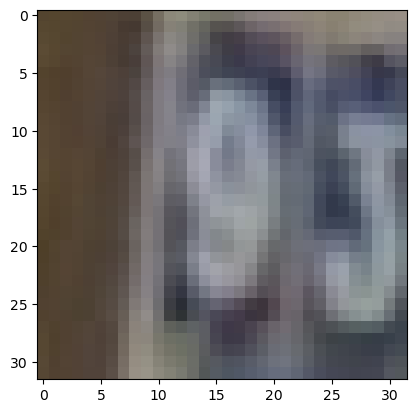

[9]


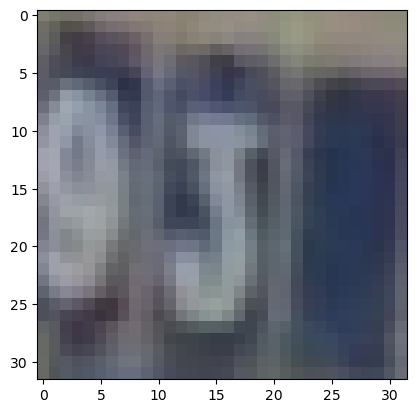

[3]


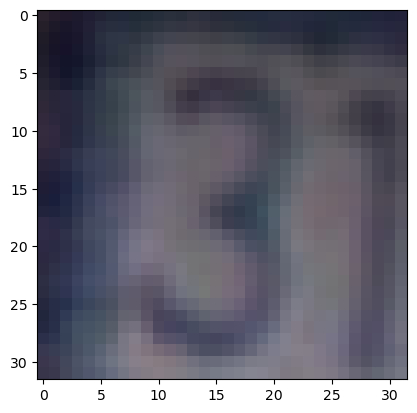

[3]


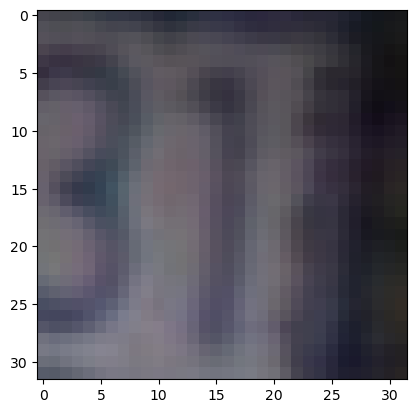

[1]


In [23]:
# plotting some sample images

for i in range(10):
    plt.imshow(x_train[i, :, :, :])
    plt.show()
    print(y_train[i])

In [24]:
# making changes to the images

x_train_gray = np.mean(x_train, 3).reshape(73257, 32, 32, 1) / 255.
x_test_gray = np.mean(x_test, 3).reshape(26032, 32, 32, 1) / 255.
x_train_plot = np.mean(x_train, 3)

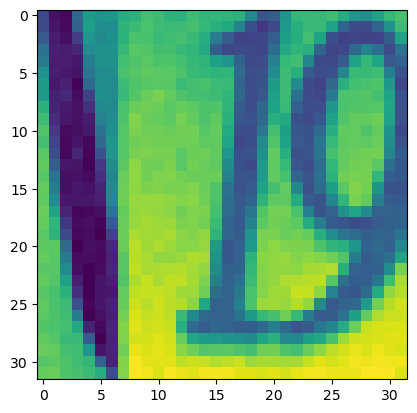

[1]


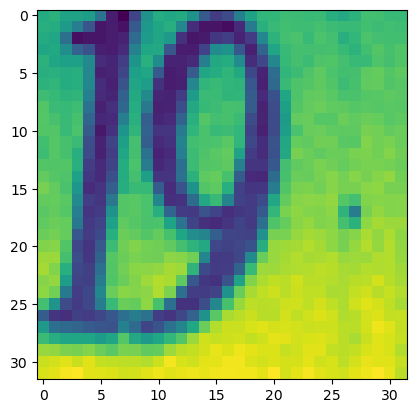

[9]


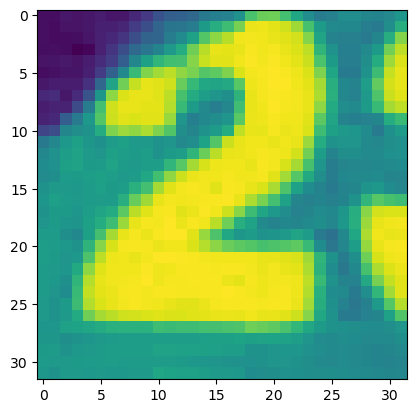

[2]


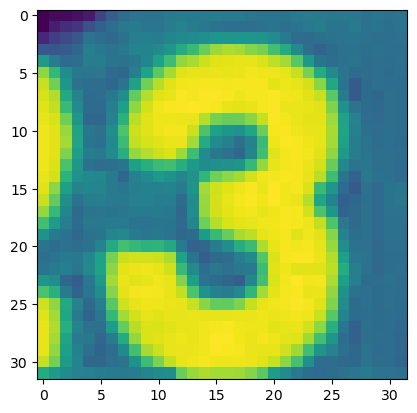

[3]


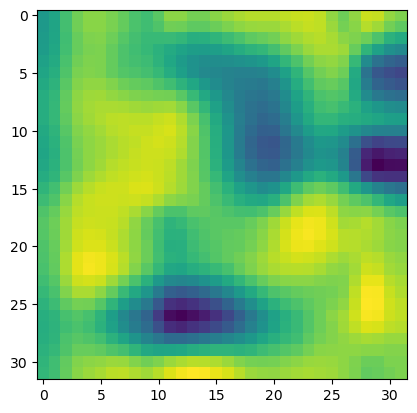

[2]


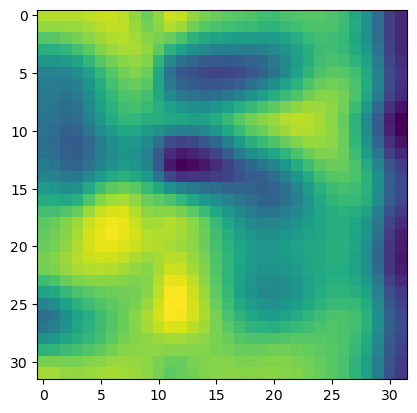

[5]


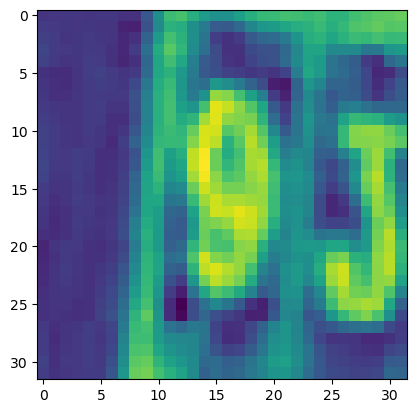

[9]


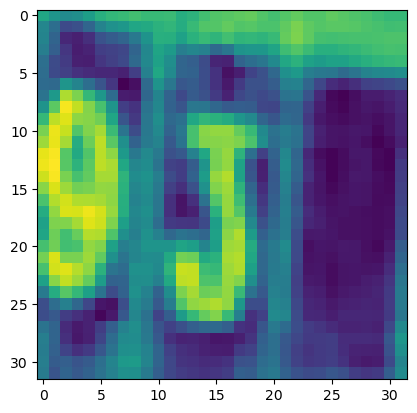

[3]


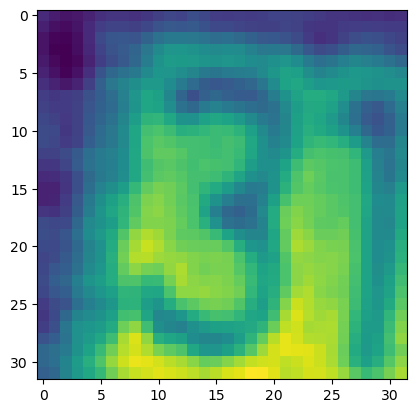

[3]


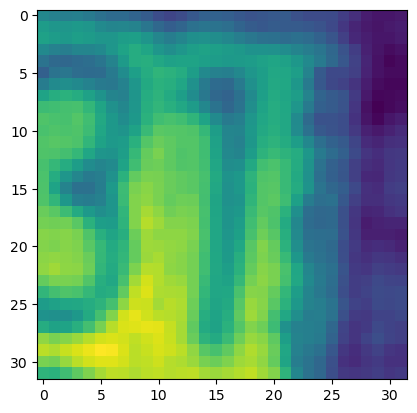

[1]


In [25]:
# plotting the training images

for i in range(10):
    plt.imshow(x_train_plot[i, :, :,])
    plt.show()
    print(y_train[i])

In [26]:
# was having trouble in MLP NN classifier, so converting to one-hot labels

x_train[0].shape

(32, 32, 3)

In [27]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train)
y_train_oh = enc.transform(y_train).toarray()
y_test_oh = enc.transform(y_test).toarray()

In [28]:
y_test_oh[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

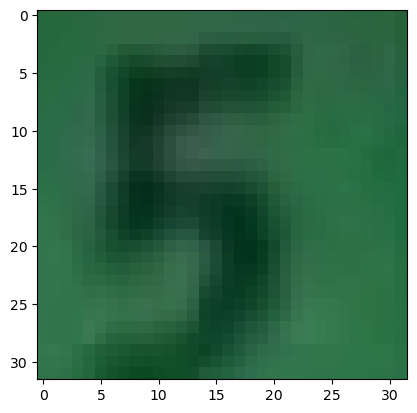

In [29]:

plt.imshow(x_test[0])


# MLP neural network classifier

In [39]:
model_seq = Sequential([
                        Flatten(input_shape=x_train[0].shape),
                        Dense(128, activation='relu'),
                        Dense(256, activation='relu'),
                        BatchNormalization(),
                        Dense(256, activation='relu'),
                        Dropout(0.5),
                        Dense(512, activation='relu'),
                        Dense(10, activation='softmax')

])

model_seq.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               393344    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [40]:
model_seq.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
checkpoint = ModelCheckpoint(filepath='sequential',
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             mode='min',
                             verbose=1)

early_stop = EarlyStopping(patience=5, monitor='loss')

In [42]:
history = model_seq.fit(x_train, y_train_oh, epochs=50,
                        validation_data=(x_test, y_test_oh),
                        batch_size=128,
                        callbacks=[checkpoint, early_stop])

Epoch 1/50
570/573 [============================>.] - ETA: 0s - loss: 1.8798 - accuracy: 0.3380
Epoch 1: val_loss improved from inf to 2.61968, saving model to sequential
573/573 [==============================] - 7s 10ms/step - loss: 1.8788 - accuracy: 0.3384 - val_loss: 2.6197 - val_accuracy: 0.2460
Epoch 2/50
570/573 [============================>.] - ETA: 0s - loss: 1.3705 - accuracy: 0.5475
Epoch 2: val_loss improved from 2.61968 to 2.14748, saving model to sequential
573/573 [==============================] - 5s 9ms/step - loss: 1.3702 - accuracy: 0.5476 - val_loss: 2.1475 - val_accuracy: 0.3530
Epoch 3/50
568/573 [============================>.] - ETA: 0s - loss: 1.1895 - accuracy: 0.6234
Epoch 3: val_loss improved from 2.14748 to 1.84913, saving model to sequential
573/573 [==============================] - 5s 9ms/step - loss: 1.1892 - accuracy: 0.6234 - val_loss: 1.8491 - val_accuracy: 0.4163
Epoch 4/50
570/573 [============================>.] - ETA: 0s - loss: 1.1245 - accura

Text(0.5, 1.0, 'Loss')

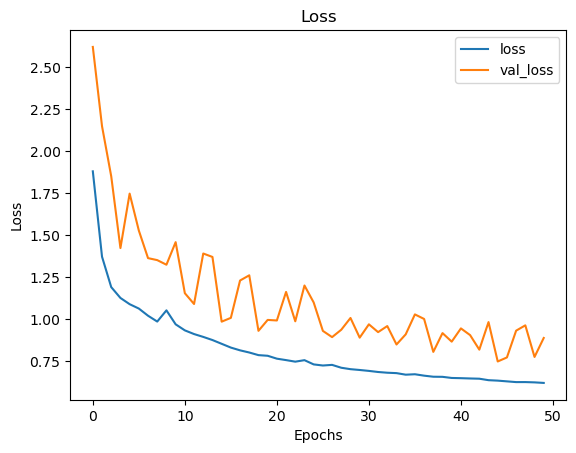

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

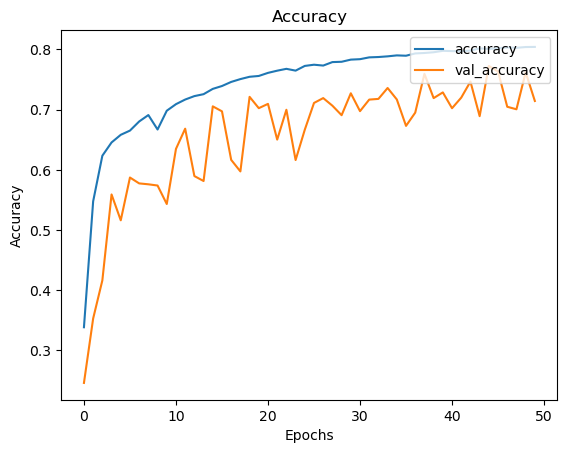

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Accuracy')

In [45]:
model_seq.evaluate(x_test, y_test_oh, verbose=2)

814/814 - 1s - loss: 0.8864 - accuracy: 0.7143 - 794ms/epoch - 975us/step


[0.8863704800605774, 0.7143131494522095]

# CNN neural network classifier

In [46]:
model_cnn = Sequential([
                        Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape),
                        MaxPooling2D((3, 3,)),
                        Conv2D(32, (3, 3), padding='same', activation='relu'),
                        MaxPooling2D((3, 3,)),
                        BatchNormalization(),
                        Conv2D(64, (3, 3), padding='same', activation='relu'),
                        MaxPooling2D((3, 3,)),
                        Dropout(0.5),
                        Flatten(),
                        Dense(64, activation='relu'),
                        Dropout(0.5),
                        Dense(10, activation='softmax')
])

model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 3, 3, 32)          128       
 chNormalization)                                                
                                                      

In [47]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [48]:
checkpoint_cnn = ModelCheckpoint(filepath='CNN', save_best_only=True,
                                 save_weights_only=True,
                                 save_freq=5000,
                                 monitor='val_acc',
                                 mode='max')
early_stop_cnn = EarlyStopping(monitor='loss', patience=7, verbose=1)

In [49]:
history = model_cnn.fit(x_train,  y_train_oh,
                        callbacks=[checkpoint_cnn, early_stop_cnn],
                        batch_size=128, validation_data=(x_test, y_test_oh),
                        epochs=50)
_

Epoch 1/50
573/573 [==============================] - 18s 30ms/step - loss: 1.9454 - accuracy: 0.3173 - val_loss: 1.3992 - val_accuracy: 0.5257
Epoch 2/50
573/573 [==============================] - 17s 29ms/step - loss: 1.1428 - accuracy: 0.6269 - val_loss: 0.8603 - val_accuracy: 0.7411
Epoch 3/50
573/573 [==============================] - 19s 33ms/step - loss: 0.9046 - accuracy: 0.7178 - val_loss: 0.7605 - val_accuracy: 0.7653
Epoch 4/50
573/573 [==============================] - 19s 34ms/step - loss: 0.8140 - accuracy: 0.7518 - val_loss: 0.6656 - val_accuracy: 0.7997
Epoch 5/50
573/573 [==============================] - 19s 33ms/step - loss: 0.7577 - accuracy: 0.7707 - val_loss: 0.6339 - val_accuracy: 0.8101
Epoch 6/50
573/573 [==============================] - 17s 30ms/step - loss: 0.7219 - accuracy: 0.7847 - val_loss: 0.5529 - val_accuracy: 0.8355
Epoch 7/50
573/573 [==============================] - 17s 30ms/step - loss: 0.6874 - accuracy: 0.7951 - val_loss: 0.5364 - val_accuracy:

[0.8863704800605774, 0.7143131494522095]

Text(0.5, 1.0, 'Loss')

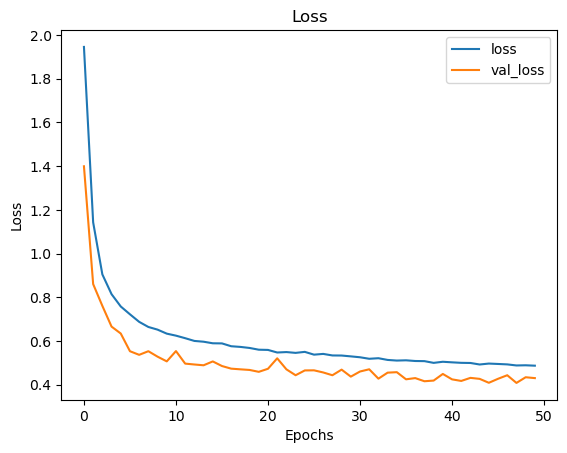

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

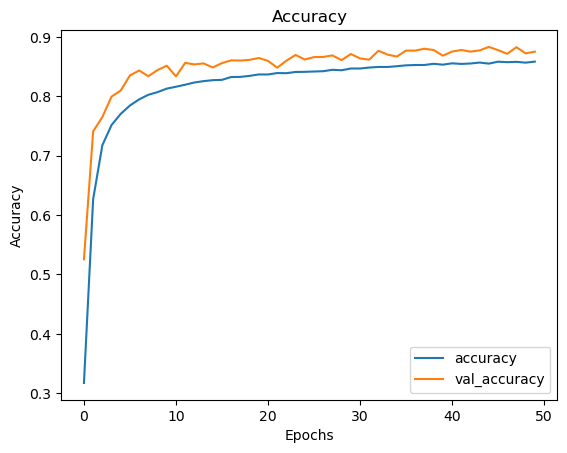

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.title('Accuracy')

In [52]:
model_cnn.evaluate(x_test, y_test_oh, verbose=2)

814/814 - 2s - loss: 0.4299 - accuracy: 0.8754 - 2s/epoch - 2ms/step


[0.4298984408378601, 0.8754225373268127]

# RNN Model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 lambda_2 (Lambda)           (None, 3, 32, 32)            0         ['input_2[0][0]']             
                                                                                                  
 lambda_3 (Lambda)           (None, 3, 1024)              0         ['lambda_2[0][0]']            
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 3, 128)               557568    ['lambda_3[0][0]']            
 onal)                                                                                      

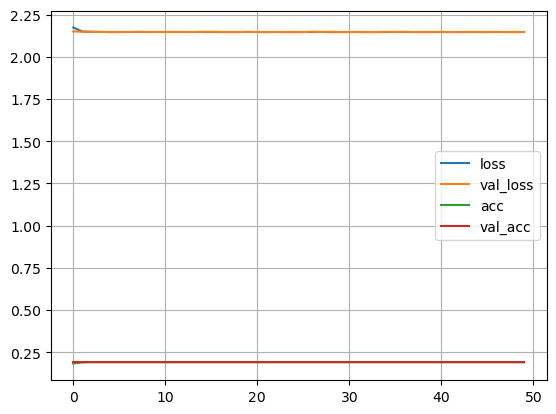

In [57]:
# Define the clipped_sparse_categorical_crossentropy function
def clipped_sparse_categorical_crossentropy(y_true, y_pred):
    # Clip labels to [0, 9] range
    y_true = K.clip(y_true, 0, 9)
    return K.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
#RNN model
H, W, C = 32, 32, 3  # Image dimensions

input_ = Input(shape=(H, W, C))

# Reshape the input to work with the RNN model
reshaped_input = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 3, 1, 2)))(input_)
reshaped_input = Lambda(lambda t: K.reshape(t, shape=(-1, C, H * W)))(reshaped_input)

M = 64

# up-down
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(reshaped_input)
x1 = GlobalMaxPooling1D()(x1)

# custom layer
rnn2 = Bidirectional(LSTM(M, return_sequences=True))
x2 = rnn2(reshaped_input)
x2 = GlobalMaxPooling1D()(x2)

# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2])

# final dense layer
output = Dense(10, activation='softmax')(x)

model_rnn = Model(inputs=input_, outputs=output)
model_rnn.summary()

model_rnn.compile(
    loss=clipped_sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']

)
# Fit the model with label clipping
r = model_rnn.fit(x_train, y_train, batch_size=1024, epochs=50, validation_split=0.25)
    
def clipped_sparse_categorical_crossentropy(y_true, y_pred):
    # Clip labels to [0, 9] range
    y_true = K.clip(y_true, 0, 9)
    return K.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)


# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.grid(True)
plt.legend()

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.grid(True)
plt.legend()

print(model_rnn.evaluate(x_test, y_test))


# Get model predictions
* Load the best weights for the MLP, CNN, and RNN models saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

# MLP Result

In [58]:
model_seq.load_weights('sequential')

1/1 [==============================] - 0s 16ms/step


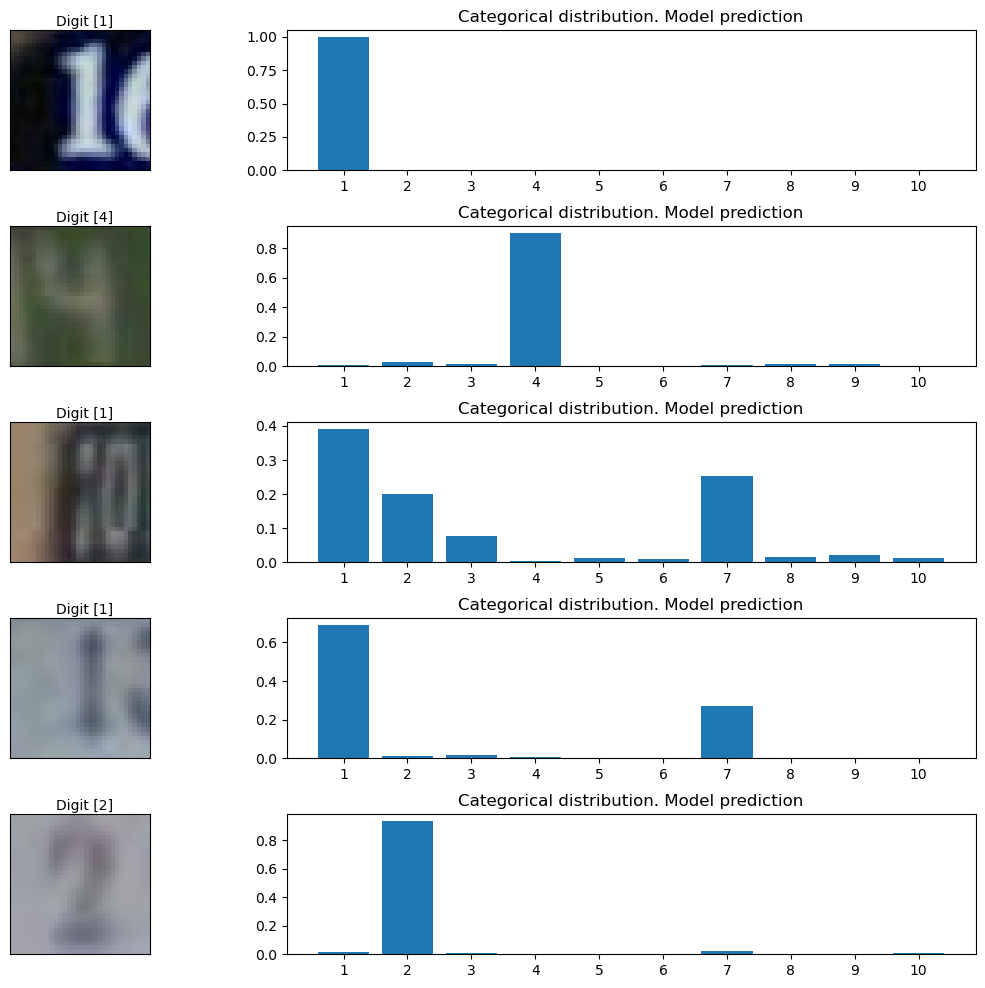

In [59]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_seq.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("Categorical distribution. Model prediction")

plt.show()


# CNN Result

1/1 [==============================] - 0s 16ms/step


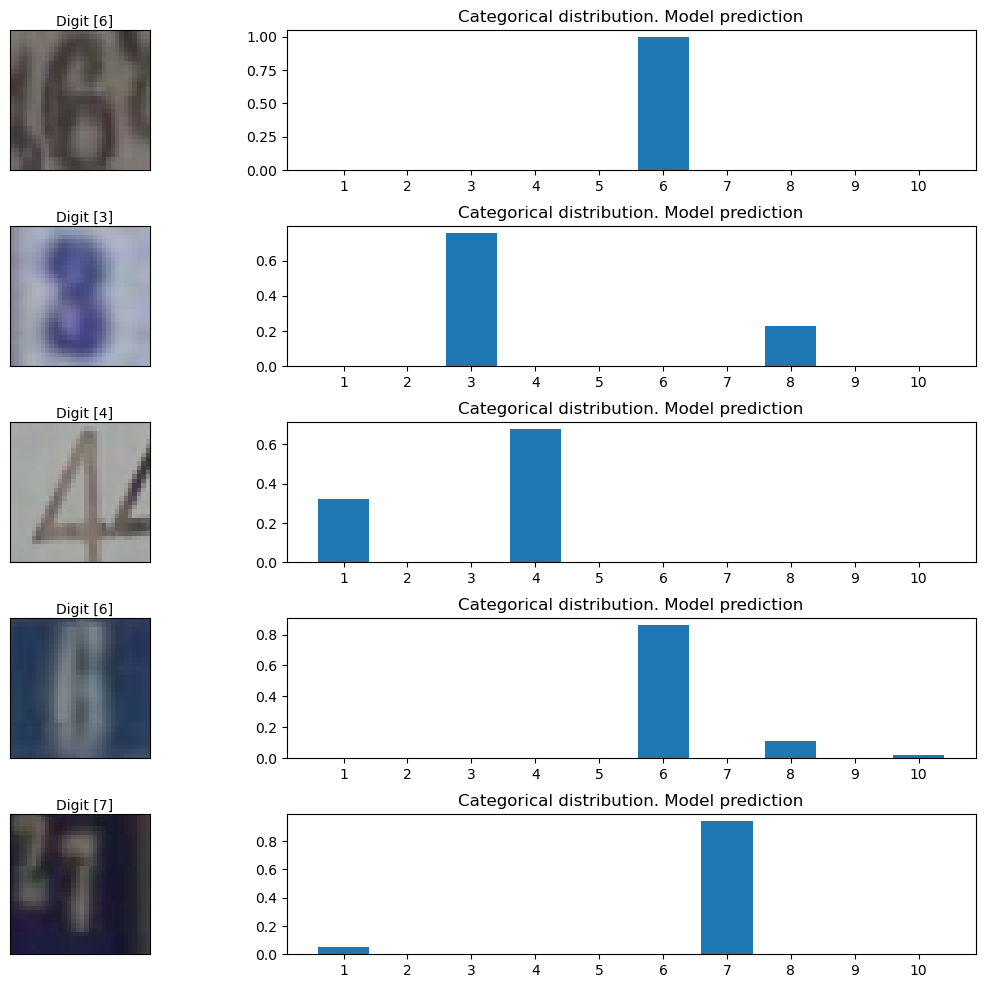

In [62]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("Categorical distribution. Model prediction")

plt.show()


# RNN Result

1/1 [==============================] - 1s 1s/step


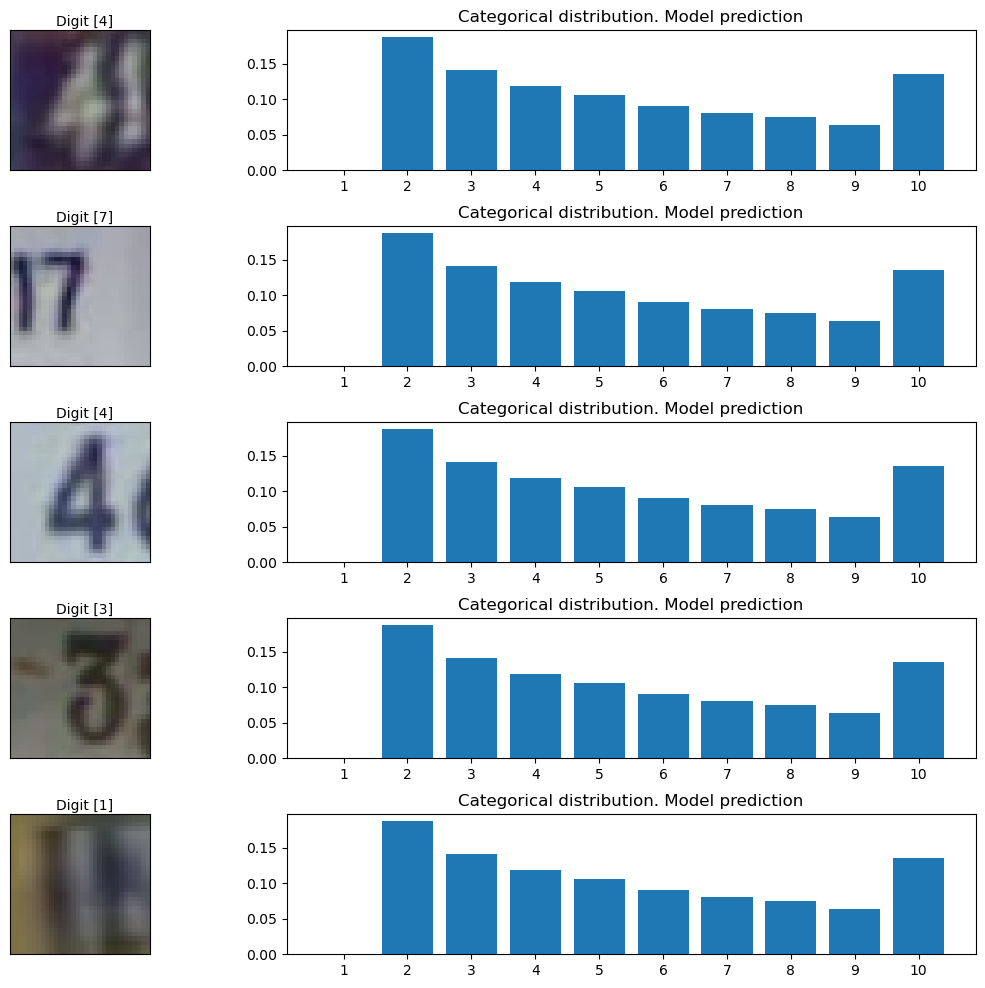

In [61]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_rnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("Categorical distribution. Model prediction")

plt.show()


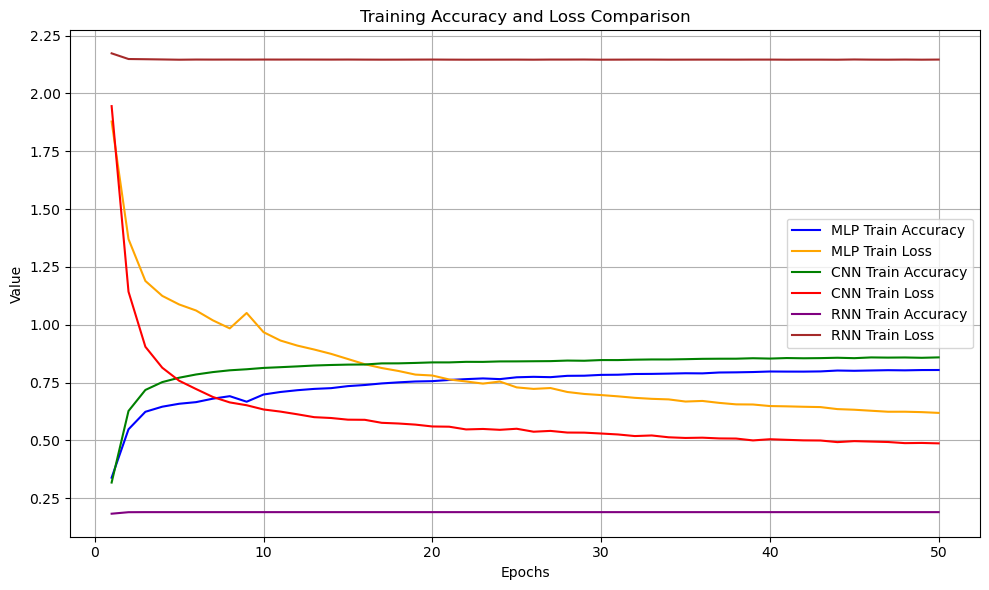

In [66]:
# Data for MLP model
mlp_epochs = list(range(1, 51))
mlp_train_loss = [1.8788, 1.3702, 1.1892, 1.1247, 1.0876, 1.0615, 1.0188, 0.9841, 1.0507, 0.9677,
                  0.9316, 0.9097, 0.8927, 0.8740, 0.8516, 0.8291, 0.8127, 0.7998, 0.7842, 0.7803,
                  0.7631, 0.7545, 0.7453, 0.7542, 0.7289, 0.7224, 0.7261, 0.7090, 0.7005, 0.6957,
                  0.6902, 0.6837, 0.6794, 0.6770, 0.6677, 0.6703, 0.6619, 0.6555, 0.6549, 0.6482,
                  0.6469, 0.6451, 0.6437, 0.6350, 0.6323, 0.6279, 0.6236, 0.6237, 0.6219, 0.6186]

mlp_train_acc = [0.3384, 0.5476, 0.6234, 0.6454, 0.6581, 0.6651, 0.6802, 0.6909, 0.6669, 0.6981,
                 0.7090, 0.7167, 0.7224, 0.7256, 0.7344, 0.7392, 0.7460, 0.7507, 0.7545, 0.7559,
                 0.7610, 0.7646, 0.7677, 0.7647, 0.7726, 0.7746, 0.7731, 0.7789, 0.7794, 0.7830,
                 0.7837, 0.7868, 0.7873, 0.7885, 0.7900, 0.7895, 0.7933, 0.7940, 0.7953, 0.7976,
                 0.7972, 0.7971, 0.7980, 0.8018, 0.8007, 0.8020, 0.8033, 0.8026, 0.8039, 0.8041]
# Data for CNN model
cnn_epochs = list(range(1, 51))
cnn_train_loss = [1.9454, 1.1428, 0.9046, 0.8140, 0.7577, 0.7219, 0.6874, 0.6639, 0.6517, 0.6334,
                  0.6242, 0.6126, 0.6001, 0.5965, 0.5893, 0.5887, 0.5757, 0.5727, 0.5679, 0.5599,
                  0.5589, 0.5471, 0.5491, 0.5454, 0.5500, 0.5372, 0.5407, 0.5336, 0.5332, 0.5294,
                  0.5253, 0.5184, 0.5210, 0.5131, 0.5102, 0.5114, 0.5082, 0.5076, 0.4996, 0.5047,
                  0.5021, 0.4998, 0.4992, 0.4922, 0.4965, 0.4946, 0.4927, 0.4878, 0.4886, 0.4868]

cnn_train_acc = [0.3173, 0.6269, 0.7178, 0.7518, 0.7707, 0.7847, 0.7951, 0.8028, 0.8073, 0.8131,
                 0.8163, 0.8197, 0.8235, 0.8258, 0.8274, 0.8279, 0.8327, 0.8329, 0.8347, 0.8370,
                 0.8370, 0.8394, 0.8392, 0.8412, 0.8414, 0.8420, 0.8425, 0.8449, 0.8441, 0.8471,
                 0.8470, 0.8487, 0.8497, 0.8497, 0.8509, 0.8524, 0.8529, 0.8530, 0.8550, 0.8535,
                 0.8558, 0.8548, 0.8555, 0.8571, 0.8553, 0.8585, 0.8577, 0.8583, 0.8569, 0.8587]

# Data for RNN model
rnn_epochs = list(range(1, 51))
rnn_train_loss = [2.1736, 2.1491, 2.1482, 2.1472, 2.1461, 2.1468, 2.1466, 2.1467, 2.1466, 2.1468,
                  2.1467, 2.1468, 2.1467, 2.1466, 2.1468, 2.1465, 2.1463, 2.1464, 2.1466, 2.1468,
                  2.1464, 2.1462, 2.1463, 2.1464, 2.1465, 2.1462, 2.1467, 2.1467, 2.1469, 2.1462,
                  2.1464, 2.1466, 2.1466, 2.1463, 2.1464, 2.1465, 2.1465, 2.1464, 2.1466, 2.1466,
                  2.1462, 2.1464, 2.1464, 2.1461, 2.1471, 2.1464, 2.1462, 2.1467, 2.1462, 2.1467]

rnn_train_acc = [0.1826, 0.1891, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894,
                 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894,
                 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894,
                 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894,
                 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894, 0.1894]
# Create the training accuracy and loss plot
plt.figure(figsize=(10, 6))

# MLP Accuracy and Loss plot
plt.plot(mlp_epochs, mlp_train_acc, label='MLP Train Accuracy', color='blue')
plt.plot(mlp_epochs, mlp_train_loss, label='MLP Train Loss', color='orange')

# CNN Accuracy and Loss plot
plt.plot(cnn_epochs, cnn_train_acc, label='CNN Train Accuracy', color='green')
plt.plot(cnn_epochs, cnn_train_loss, label='CNN Train Loss', color='red')

# RNN Accuracy and Loss plot
plt.plot(rnn_epochs, rnn_train_acc, label='RNN Train Accuracy', color='purple')
plt.plot(rnn_epochs, rnn_train_loss, label='RNN Train Loss', color='brown')

plt.title('Training Accuracy and Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()